In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load training and test sets from pickle (if saved previously)
train = pd.read_pickle('train_data.pkl')
test = pd.read_pickle('test_data.pkl')

# Verify the data is loaded correctly
print("Training set:")
print(train.head())
print("Test set:")
print(test.head())


Training set:
                Close       High        Low       Open     Volume
Date                                                             
2015-01-02  24.320429  24.789798  23.879978  24.778675  212818400
2015-01-05  23.635286  24.169166  23.448429  24.089084  257142000
2015-01-06  23.637514  23.897780  23.274920  23.699800  263188400
2015-01-07  23.968964  24.069065  23.735391  23.846616  160423600
2015-01-08  24.889904  24.947741  24.180289  24.298189  237458000
Test set:
                 Close        High         Low        Open    Volume
Date                                                                
2021-04-21  130.595139  130.839699  128.443012  129.479945  68847100
2021-04-22  129.069061  131.230965  128.550595  130.145117  84566500
2021-04-23  131.397293  132.179874  129.284290  129.284290  78657500
2021-04-26  131.788605  132.121203  130.653842  131.896212  66905100
2021-04-27  131.465775  132.463584  131.191868  132.072279  66015800


In [37]:
import warnings
warnings.simplefilter("ignore")

from statsmodels.tsa.stattools import adfuller
# Check for NaN values and fill
train['Close'].fillna(method='ffill', inplace=True)
# Check stationarity
adf_result = adfuller(train['Close'])
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
# Adjust ARIMA order based on stationarity
p, d, q = (3, 1, 0) # Reduced unnecessary AR terms
# Fit ARIMA model with robust covariance
model = ARIMA(train['Close'], order=(p, d, q))
model_fit = model.fit(cov_type="robust")
# Print model summary
print(model_fit.summary())

ADF Statistic: 1.1712583745711735
p-value: 0.995781163918296
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1585
Model:                 ARIMA(3, 1, 0)   Log Likelihood               -2604.664
Date:                Sun, 30 Mar 2025   AIC                           5217.327
Time:                        12:34:26   BIC                           5238.798
Sample:                             0   HQIC                          5225.304
                               - 1585                                         
Covariance Type:               robust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1089      0.053     -2.068      0.039      -0.212      -0.006
ar.L2          0.0289      0.062      0.462      0.644      -0.093    

In [38]:
print(f"NaN values in forecast: {forecast.isna().sum()}")

NaN values in forecast: 0


In [39]:
print(forecast.head()) # Show the first few forecasted values
print(forecast.tail()) # Show the last few forecasted values


1585    130.570208
1586    130.637618
1587    130.812020
1588    130.946244
1589    131.083406
Name: predicted_mean, dtype: float64
1757    154.220914
1758    154.358638
1759    154.496362
1760    154.634086
1761    154.771811
Name: predicted_mean, dtype: float64


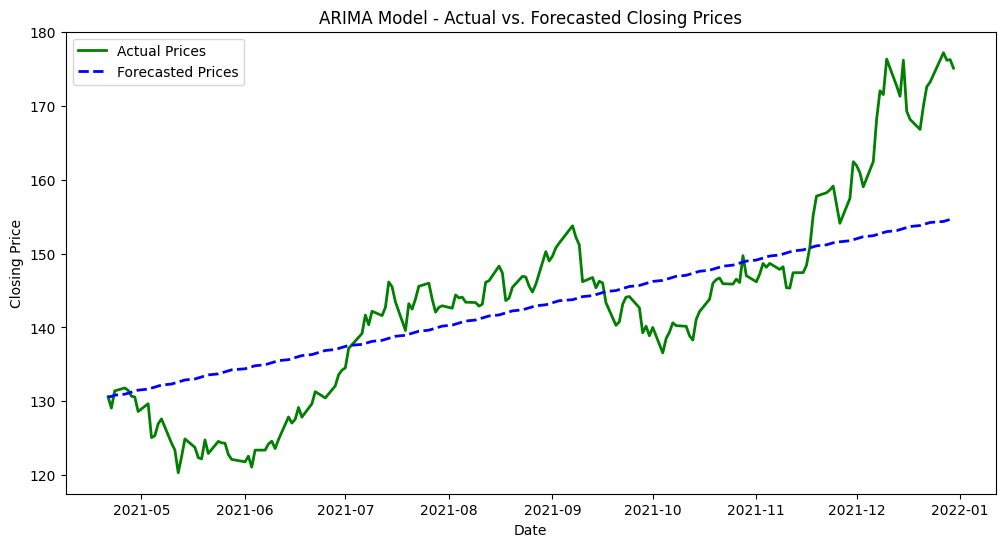

In [40]:
import matplotlib.pyplot as plt

# Ensure forecast is reindexed to match the test index
forecast.index = test.index

# Plot actual prices
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Close'], label='Actual Prices', color='green', linewidth=2)

# Plot forecasted prices
plt.plot(forecast.index, forecast, label='Forecasted Prices', color='blue', linestyle='--', linewidth=2)

# Add legend, title, and labels
plt.legend()
plt.title("ARIMA Model - Actual vs. Forecasted Closing Prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

In [41]:
# Adjust ARIMA order
p, d, q = 5, 2, 1  # Try increasing d and adding q

# Fit ARIMA model with new parameters
model = ARIMA(train['Close'], order=(p, d, q))
model_fit = model.fit(cov_type="robust")

# Print new model summary
print(model_fit.summary())

# Generate new forecast
forecast_steps = len(test)  # Forecasting the test set length
forecast = model_fit.forecast(steps=forecast_steps)

# Check new forecast values
print(forecast.head())  
print(forecast.tail())  


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1585
Model:                 ARIMA(5, 2, 1)   Log Likelihood               -2603.765
Date:                Sun, 30 Mar 2025   AIC                           5221.530
Time:                        12:34:28   BIC                           5259.100
Sample:                             0   HQIC                          5235.489
                               - 1585                                         
Covariance Type:               robust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1143      0.053     -2.160      0.031      -0.218      -0.011
ar.L2          0.0229      0.065      0.354      0.723      -0.104       0.150
ar.L3         -0.0140      0.051     -0.271      0.7

In [42]:
print(forecast.head())  # Show the first few forecasted values
print(forecast.tail())  # Show the last few forecasted values


1585    130.570208
1586    130.637618
1587    130.812020
1588    130.946244
1589    131.083406
Name: predicted_mean, dtype: float64
1757    154.220914
1758    154.358638
1759    154.496362
1760    154.634086
1761    154.771811
Name: predicted_mean, dtype: float64


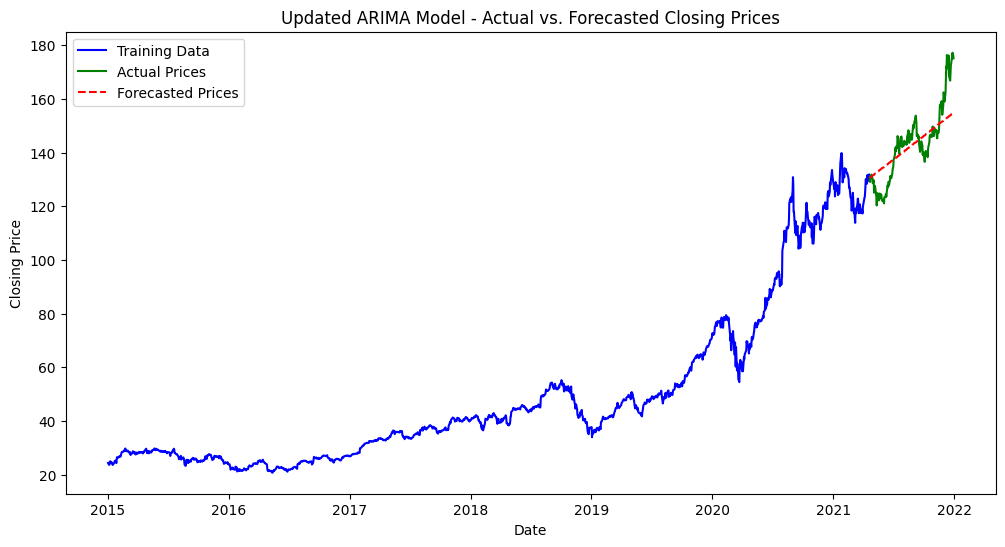

In [43]:
# -----------------------------
# 🔹 Plot Actual vs. Forecasted Prices
# -----------------------------

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Training Data', color='blue')
plt.plot(test.index, test['Close'], label='Actual Prices', color='green')
plt.plot(test.index, forecast, label='Forecasted Prices', color='red', linestyle='dashed')
plt.legend()
plt.title("Updated ARIMA Model - Actual vs. Forecasted Closing Prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()


In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test['Close'], forecast)
mae = mean_absolute_error(test['Close'], forecast)
print(f'MSE: {mse}, MAE: {mae}')


MSE: 70.20997609439783, MAE: 6.559069558218672


ADF Statistic (Before Differencing): 1.1712583745711735
p-value: 0.995781163918296
ADF Statistic (After 1st Differencing): -7.6886865381471825
p-value: 1.438541881862807e-11
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1585
Model:                 ARIMA(5, 2, 1)   Log Likelihood               -2603.765
Date:                Sun, 30 Mar 2025   AIC                           5221.530
Time:                        12:34:30   BIC                           5259.100
Sample:                             0   HQIC                          5235.489
                               - 1585                                         
Covariance Type:               robust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1143      0.053    

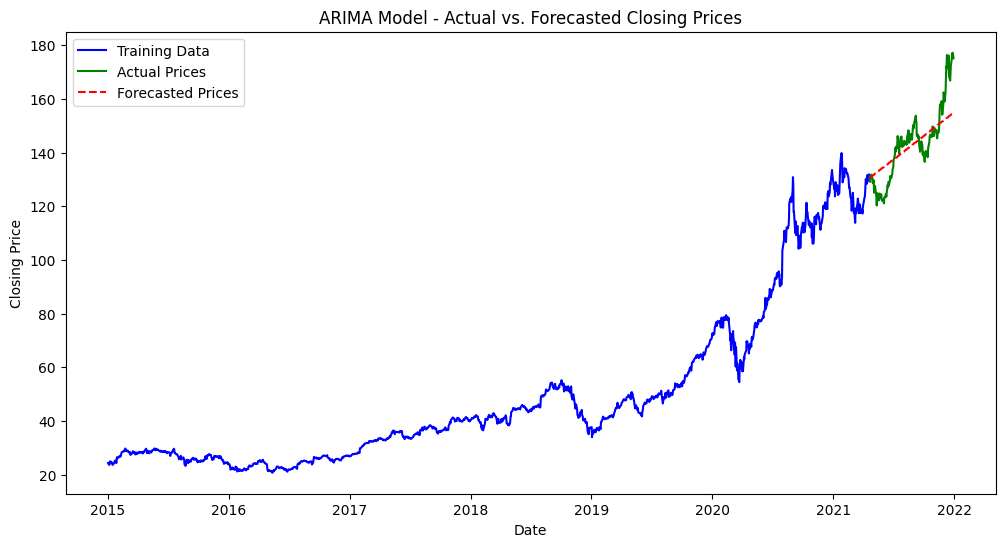

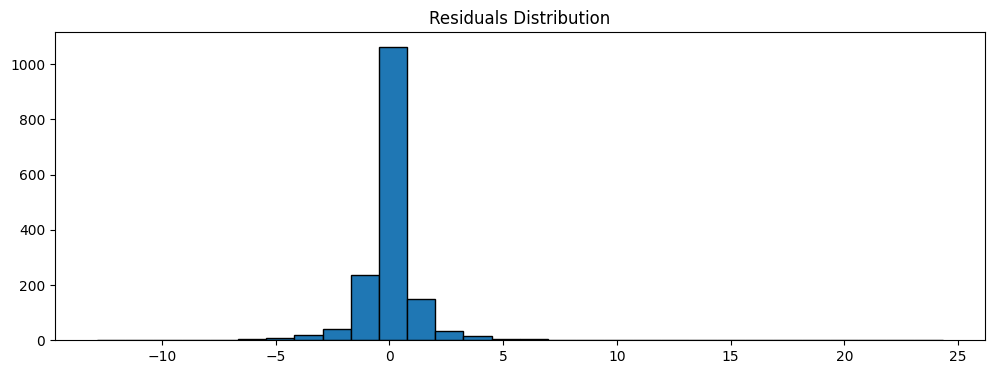

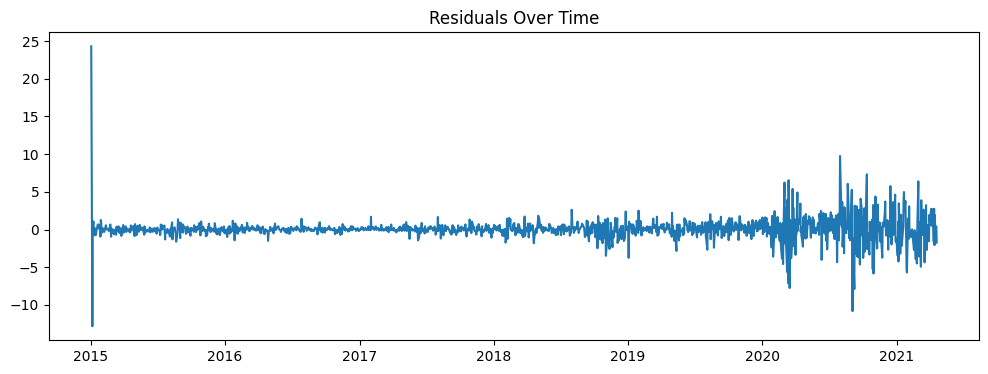

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Ensure no NaN values by forward-filling (using .ffill() as recommended)
train['Close'].ffill(inplace=True)

# ------------------------------
# Stationarity Testing
# ------------------------------
# Check stationarity before differencing
adf_result = adfuller(train['Close'])
print("ADF Statistic (Before Differencing):", adf_result[0])
print("p-value:", adf_result[1])

# Check stationarity after 1st differencing
diff_train = train['Close'].diff().dropna()
adf_result_diff = adfuller(diff_train)
print("ADF Statistic (After 1st Differencing):", adf_result_diff[0])
print("p-value:", adf_result_diff[1])

# ------------------------------
# ARIMA Model Fitting & Forecasting
# ------------------------------
# Using the ARIMA order from your PDF adjustment (p, d, q) = (5, 2, 1)
p, d, q = 5, 2, 1
model = ARIMA(train['Close'], order=(p, d, q))
model_fit = model.fit(cov_type="robust")
print(model_fit.summary())

# Generate forecast using the .forecast() method (as in your PDF)
forecast_steps = len(test)  # Forecast length equal to the test set length
forecast = model_fit.forecast(steps=forecast_steps)
print("Forecast head:")
print(forecast.head())
print("Forecast tail:")
print(forecast.tail())

# ------------------------------
# Model Performance Evaluation
# ------------------------------
mse = mean_squared_error(test['Close'], forecast)
mae = mean_absolute_error(test['Close'], forecast)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# ------------------------------
# Visualization: Actual vs Forecasted Prices
# ------------------------------
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Training Data', color='blue')
plt.plot(test.index, test['Close'], label='Actual Prices', color='green')
plt.plot(test.index, forecast, label='Forecasted Prices', color='red', linestyle='dashed')
plt.title("ARIMA Model - Actual vs. Forecasted Closing Prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

# ------------------------------
# Residual Analysis
# ------------------------------
residuals = model_fit.resid

plt.figure(figsize=(12, 4))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title("Residuals Distribution")
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(residuals)
plt.title("Residuals Over Time")
plt.show()
